<a href="https://colab.research.google.com/github/emsiefert/NeuroCoreCourse/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

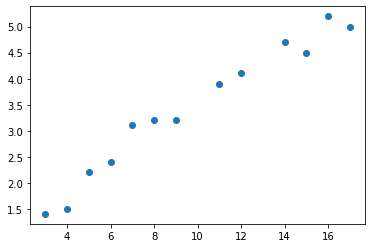

[1.62367672 1.88836084 2.15304496 2.41772908 2.6824132  2.94709732
 3.21178145 3.74114969 4.00583381 4.53520205 4.79988617 5.06457029
 5.32925441]


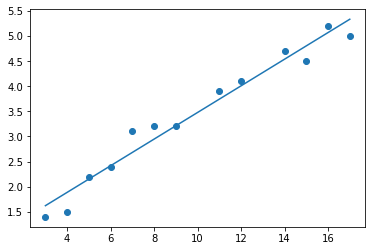

0.8296243597040416 [0.26468412] 0.9633822518042856


In [39]:
# I worked with emily meyer on this homework assignment

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

age = [3,4,5,6,7,8,9,11,12,14,15,16,17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# 1. plot relationship between age and wing_length

plt.scatter(age,wing_length)
plt.show()

# 2. calculate and plot the regression line:
x = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17]).reshape(-1, 1)
Y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])
reg = LinearRegression().fit(x, Y)

reg.coef_
reg.intercept_
Y2 = age*reg.coef_ + reg.intercept_
print(Y2)

plt.plot(age,Y2)
plt.scatter(age,wing_length,)
plt.show()

# intercept, coef, score
print(reg.intercept_, reg.coef_, reg.score(x, Y))


In [40]:
# 3. Can you reject H_0: b=0?

import statsmodels.api as sm

x = age
x = sm.add_constant(x)

model = sm.OLS(Y,x).fit()
print(model.summary())

#I reject the null, my f-stat is 289.4, prop (F-statistic) is 3.01e-09

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     289.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           3.01e-09
Time:                        01:07:42   Log-Likelihood:                0.36312
No. Observations:                  13   AIC:                             3.274
Df Residuals:                      11   BIC:                             4.404
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8296      0.168      4.946      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


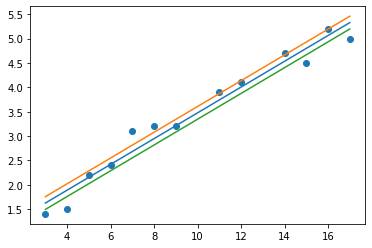

In [43]:
# 4. calculate and plot the confidence intervals on teh slope of the regression

MSE = 0.016
t = 17.012

ci = t*np.sqrt(MSE / np.sum((age - np.mean(age))**2))

plt.plot(age,Y2)
plt.scatter(age,wing_length,)
plt.plot(age, Y2 + ci)
plt.plot(age, Y2 -ci)
plt.show()

# confidence interval is between orange and green

In [46]:
# 5. calculate R^2 

# i got this from both of my models above, r^2 = 0.963

In [51]:
# 6. Calcuate pearson's r

from numpy import cov
from numpy.random import seed
seed(1)
from scipy.stats import pearsonr

covariance = cov(age, wing_length)
print(covariance)

corr, _ = pearsonr(age, wing_length)
print('Pearsons correlation: %.3f' % corr)

[[22.52564103  5.96217949]
 [ 5.96217949  1.63807692]]
Pearsons correlation: 0.982


[[0.26121788]]
[0.84893413]


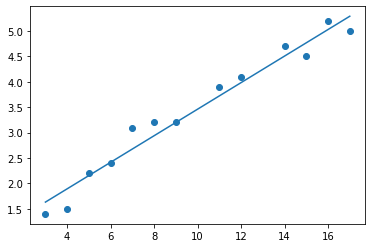

In [52]:
# add noise into model and see how regression changes

noise = np.random.normal(0,0.1,13)
age = np.array(age).reshape(-1,1)
new_wing_length = np.array(wing_length + noise).reshape(-1,1)
reg = LinearRegression().fit(age, new_wing_length)
print(reg.coef_)
print(reg.intercept_)
Y = age*reg.coef_ + reg.intercept_
plt.plot(age,Y)
plt.scatter(age,wing_length)
plt.show()